In [1]:
pip install pandas


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install requests


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install matplotlib


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


## Question 1: -
Write a program that takes a string as input, and counts the frequency of each word in the string, there might
be repeated characters in the string. Your task is to find the highest frequency and returns the length of the
highest-frequency word.

Note - You have to write at least 2 additional test cases in which your program will run successfully and provide
an explanation for the same.
Example input - string = “write write write all the number from from from 1 to 100”
Example output - 5
Explanation - From the given string we can note that the most frequent words are “write” and “from” and
the maximum value of both the values is “write” and its corresponding length is 5

In [7]:
def find_highest_frequency_word_length(string):
    words = string.split()

    word_frequency = {}
    for word in words:
        word_frequency[word] = word_frequency.get(word, 0) + 1

    max_frequency = max(word_frequency.values())

    highest_frequency_word = max(word_frequency, key=word_frequency.get)
    highest_frequency_word_length = len(highest_frequency_word)

    return highest_frequency_word_length


# Test case 1
string1 = "write write write all the number from from from 1 to 100"
output1 = find_highest_frequency_word_length(string1)
print(output1)  # Output: 5

# Test case 2
string2 = "Sweet home home home"
output2 = find_highest_frequency_word_length(string2)
print(output2)  # Output: 4

# Test case 3
string3 = "apple apple apple orange orange orange orange orange"
output3 = find_highest_frequency_word_length(string3)
print(output3)  # Output: 6


5
4
6


## Question 6 -

Using the data from Question 3, write code to analyze the data and answer the following questions 
Note
1. Draw plots to demonstrate the analysis for the following questions for better visualizations.
2. Write code comments wherever required for code understanding

Insights to be drawn -
● Get all Pokemons whose spawn rate is less than 5%
● Get all Pokemons that have less than 4 weaknesses
● Get all Pokemons that have no multipliers at all
● Get all Pokemons that do not have more than 2 evolutions
● Get all Pokemons whose spawn time is less than 300 seconds.
Note - spawn time format is "05:32”, so assume “minute: second” format and perform the analysis.
● Get all Pokemon who have more than two types of capabilities

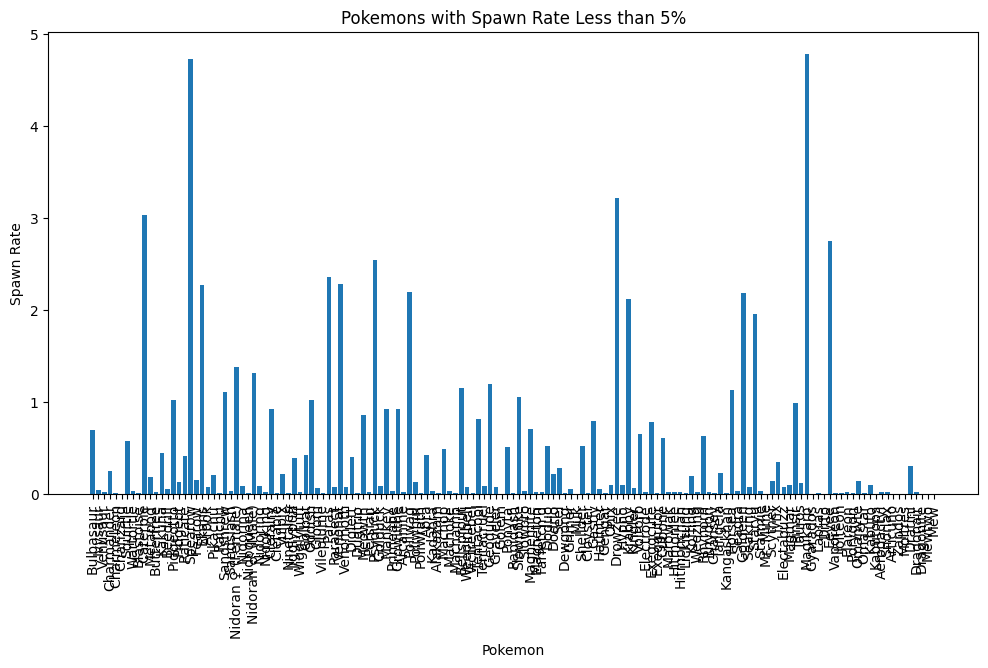

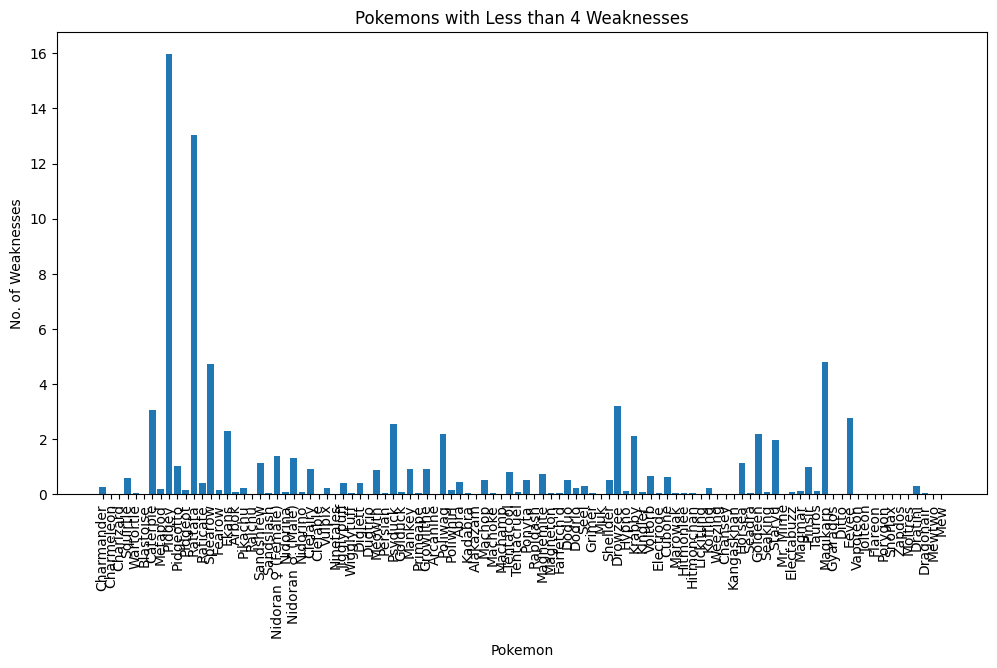

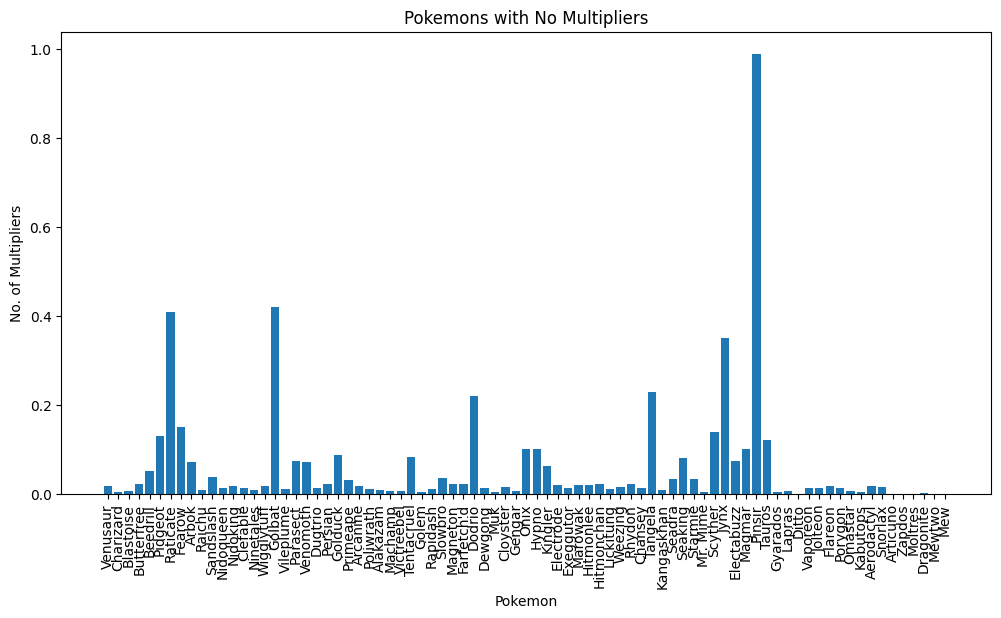

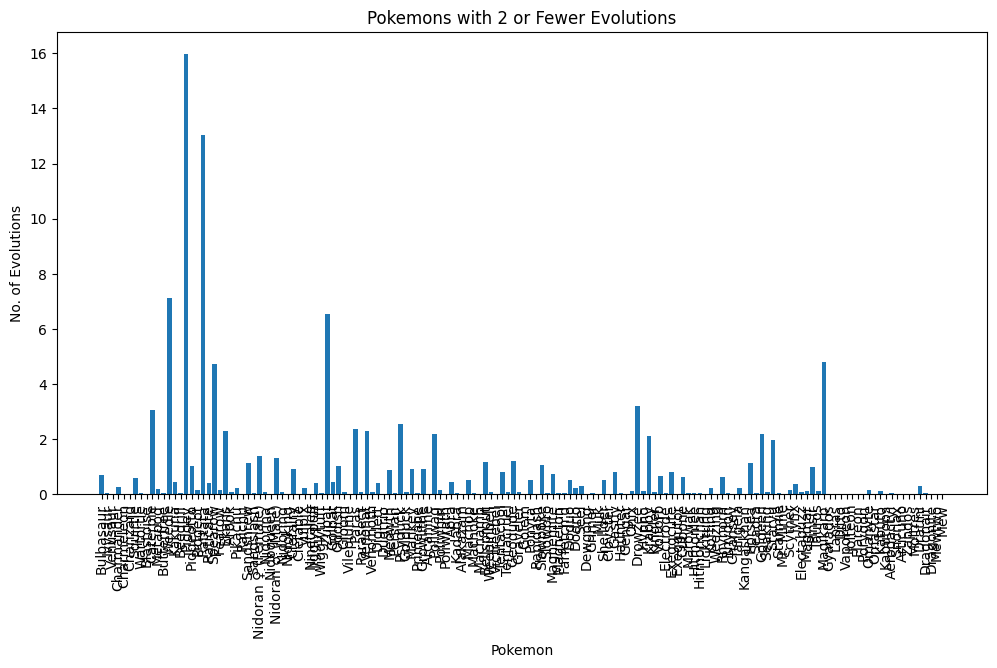

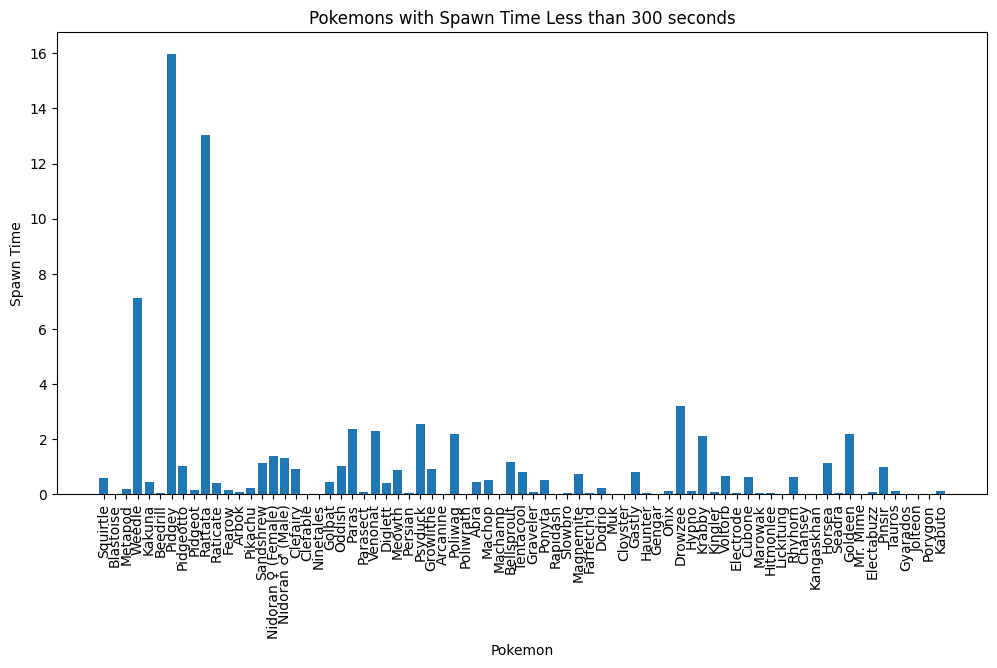

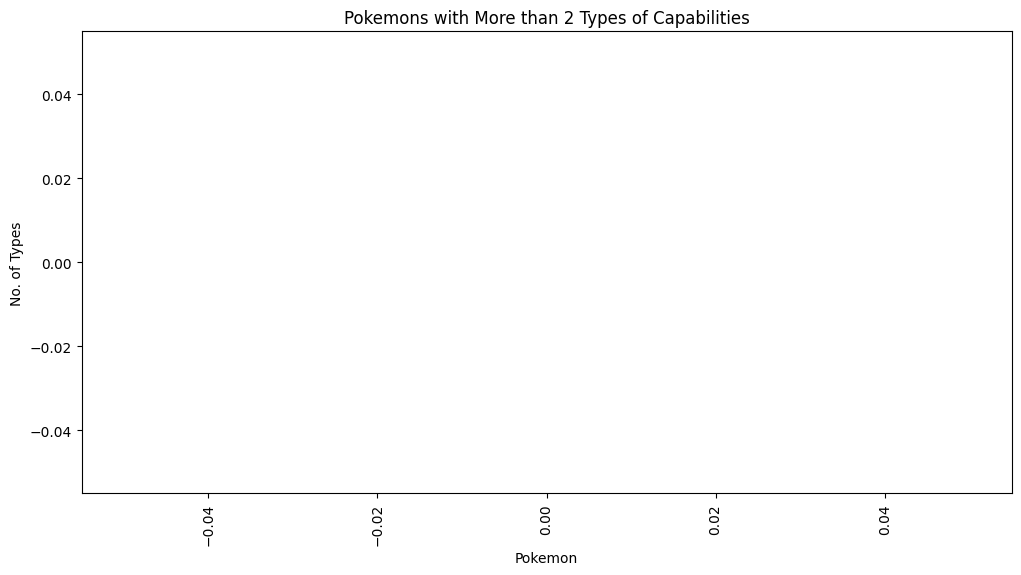

In [6]:
import pandas as pd
import requests
import matplotlib.pyplot as plt

def download_data(url):
    response = requests.get(url)
    if response.status_code == 200:
        return response.json()
    else:
        raise Exception("Failed to download data")

def analyze_data(data):
    if data is None or 'pokemon' not in data:
        raise Exception("Invalid data format")

    # Extract relevant attributes from the data dictionary
    pokemon_data = data['pokemon']

    # Get all Pokemons whose spawn rate is less than 5%
    spawn_rate_threshold = 5
    spawn_rate_filtered = [pokemon for pokemon in pokemon_data if pokemon.get('spawn_chance', 0) < spawn_rate_threshold]

    # Get all Pokemons that have less than 4 weaknesses
    max_weaknesses = 4
    weaknesses_filtered = [pokemon for pokemon in pokemon_data if len(pokemon.get('weaknesses', [])) < max_weaknesses]

    # Get all Pokemons that have no multipliers at all
    no_multipliers = [pokemon for pokemon in pokemon_data if not pokemon.get('multipliers')]

    # Get all Pokemons that do not have more than 2 evolutions
    max_evolutions = 2
    evolutions_filtered = [pokemon for pokemon in pokemon_data if len(pokemon.get('next_evolution', [])) <= max_evolutions]

    # Get all Pokemons whose spawn time is less than 300 seconds
    spawn_time_threshold = 300
    spawn_time_filtered = [pokemon for pokemon in pokemon_data if pokemon.get('spawn_time', 'N/A') != 'N/A' and int(pokemon.get('spawn_time', '0:00').split(':')[0]) * 60 +
                           int(pokemon.get('spawn_time', '0:00').split(':')[1]) < spawn_time_threshold]

    # Get all Pokemon who have more than two types of capabilities
    min_capability_types = 2
    capability_types_filtered = [pokemon for pokemon in pokemon_data if len(pokemon.get('type', [])) > min_capability_types]

    return spawn_rate_filtered, weaknesses_filtered, no_multipliers, evolutions_filtered, spawn_time_filtered, capability_types_filtered

def plot_bar_chart(data, title, x_label, y_label):
    x = [pokemon.get('name') for pokemon in data]
    y = [pokemon.get('spawn_chance') for pokemon in data]
    plt.figure(figsize=(12, 6))
    plt.bar(x, y)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.xticks(rotation=90)
    plt.show()

try:
    # Download data from the provided link
    data_url = "https://raw.githubusercontent.com/Biuni/PokemonGO-Pokedex/master/pokedex.json"
    pokemon_data = download_data(data_url)

    # Analyze the data
    spawn_rate_filtered, weaknesses_filtered, no_multipliers, evolutions_filtered, spawn_time_filtered, capability_types_filtered = analyze_data(pokemon_data)

    # Plotting analysis results
    plot_bar_chart(spawn_rate_filtered, "Pokemons with Spawn Rate Less than 5%", "Pokemon", "Spawn Rate")
    plot_bar_chart(weaknesses_filtered, "Pokemons with Less than 4 Weaknesses", "Pokemon", "No. of Weaknesses")
    plot_bar_chart(no_multipliers, "Pokemons with No Multipliers", "Pokemon", "No. of Multipliers")
    plot_bar_chart(evolutions_filtered, "Pokemons with 2 or Fewer Evolutions", "Pokemon", "No. of Evolutions")
    plot_bar_chart(spawn_time_filtered, "Pokemons with Spawn Time Less than 300 seconds", "Pokemon", "Spawn Time")
    plot_bar_chart(capability_types_filtered, "Pokemons with More than 2 Types of Capabilities", "Pokemon", "No. of Types")
except Exception as e:
    print("Error:", str(e))


## Question 4 -
Write a program to download the data from the link given below and then read the data and convert the into
the proper structure and return it as a CSV file.
Link - https://data.nasa.gov/resource/y77d-th95.json
Note - Write code comments wherever needed for code understanding.

Sample Data -

Excepted Output Data Attributes
● Name of Earth Meteorite - string id - ID of Earth
● Meteorite - int nametype - string recclass - string
● mass - Mass of Earth Meteorite - float year - Year at which Earth
● Meteorite was hit - datetime format reclat - float recclong - float
● point coordinates - list of int

In [16]:
import requests
import pandas as pd

# Function to download data from a URL
def download_data(url):
    response = requests.get(url)
    data = response.json()
    return data

# Function to process the data
def process_data(data):
    # Create an empty list to store the processed data
    processed_data = []

    # Iterate over each record in the data
    for record in data:
        # Extract the desired fields from each record and append them to the processed data list
        processed_data.append({
            'name': record.get('name', ''),
            'id': record.get('id', ''),
            'nametype': record.get('nametype', ''),
            'recclass': record.get('recclass', ''),
            'mass': record.get('mass (g)', ''),
            'year': pd.to_datetime(record.get('year', ''), errors='coerce'),
            'reclat': record.get('reclat', ''),
            'reclong': record.get('reclong', '')
        })

    return processed_data

# Function to save the processed data as a CSV file
def save_as_csv(data, filename):
    # Convert the processed data into a DataFrame
    df = pd.DataFrame(data)

    # Save the DataFrame to a CSV file
    df.to_csv(filename, index=False)

# URL to download the data from
data_url = 'https://data.nasa.gov/resource/y77d-th95.json'

# Download the data
nasa_data = download_data(data_url)

# Process the data
processed_data = process_data(nasa_data)

# Save the processed data as a CSV file
output_filename = 'nasa_data.csv'
save_as_csv(processed_data, output_filename)

print('Data downloaded, processed, and saved as', output_filename)


Data downloaded, processed, and saved as nasa_data.csv


In [17]:
ls

 Volume in drive D has no label.
 Volume Serial Number is 6078-C2CF

 Directory of d:\biswa

17-05-2023  12:20    <DIR>          .
17-05-2023  12:20    <DIR>          ..
17-05-2023  12:20            59,220 nasa_data.csv
17-05-2023  12:18           689,333 Python.ipynb
               2 File(s)        748,553 bytes
               2 Dir(s)  51,064,705,024 bytes free


In [19]:
pd.read_csv('nasa_data.csv')

,name,id,nametype,recclass,mass,year,reclat,reclong
0,Aachen,1,Valid,L5,NaN,1880-01-01,50.77500,6.08333
1,Aarhus,2,Valid,H6,NaN,1951-01-01,56.18333,10.23333
2,Abee,6,Valid,EH4,NaN,1952-01-01,54.21667,-113.00000
3,Acapulco,10,Valid,Acapulcoite,NaN,1976-01-01,16.88333,-99.90000
4,Achiras,370,Valid,L6,NaN,1902-01-01,-33.16667,-64.95000
...,...,...,...,...,...,...,...,...
995,Tirupati,24009,Valid,H6,NaN,1934-01-01,13.63333,79.41667
996,Tissint,54823,Valid,Martian (shergottite),NaN,2011-01-01,29.48195,-7.61123
997,Tjabe,24011,Valid,H6,NaN,1869-01-01,-7.08333,111.53333
998,Tjerebon,24012,Valid,L5,NaN,1922-01-01,-6.66667,106.58333


In [18]:
import pandas as pd
df = pd.read_csv('nasa_data.csv')
print(df.head())

       name   id nametype     recclass  mass        year    reclat    reclong
0    Aachen    1    Valid           L5   NaN  1880-01-01  50.77500    6.08333
1    Aarhus    2    Valid           H6   NaN  1951-01-01  56.18333   10.23333
2      Abee    6    Valid          EH4   NaN  1952-01-01  54.21667 -113.00000
3  Acapulco   10    Valid  Acapulcoite   NaN  1976-01-01  16.88333  -99.90000
4   Achiras  370    Valid           L6   NaN  1902-01-01 -33.16667  -64.95000
